In [344]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [345]:
data = pd.read_csv('cluster_data.csv')

In [346]:
data.head()

,x,y
0,0.227680,0.858204
1,0.979188,0.077151
2,0.504577,0.553114
3,0.058132,0.528098
4,0.775343,0.217922


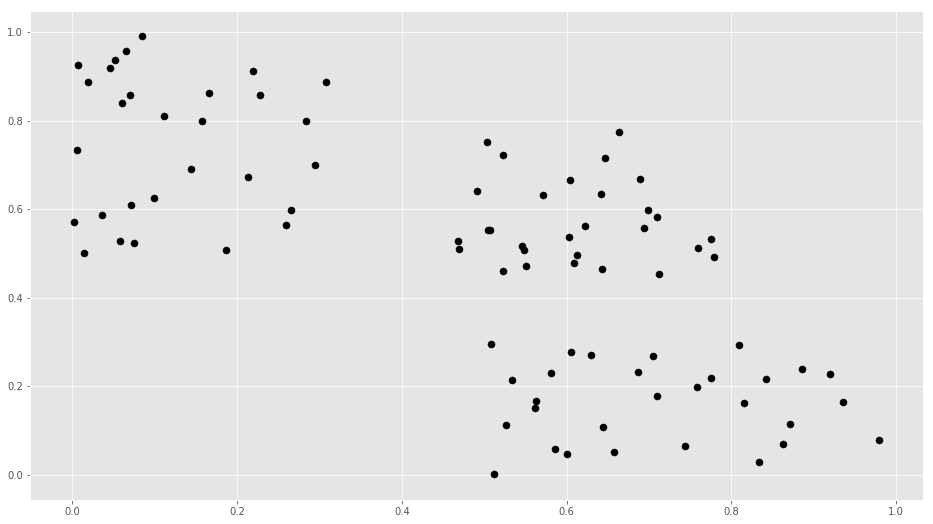

In [347]:
plt.scatter(data['x'],data['y'],s=50,c='k')

In [348]:
x1 = data['x']
x2 = data['y']
x = np.array([x1,x2]).T

In [349]:
# Number of clusters
k = 3

# No of iterations
iterations = 10

# Getting the random value of centroid 

# c has k rows and 2 columns
c = np.zeros((k,2)) # 2 means (x,y) and k means number of (x,y) points, which are called centroids

for i in range(k):
    c[i] = np.random.rand(2)
cx = c[:,0]
cy = c[:,1]

print('Centroids : ' + str(c))

Centroids : [[0.05366669 0.84974351]
 [0.29347733 0.96629855]
 [0.23051211 0.38524408]]


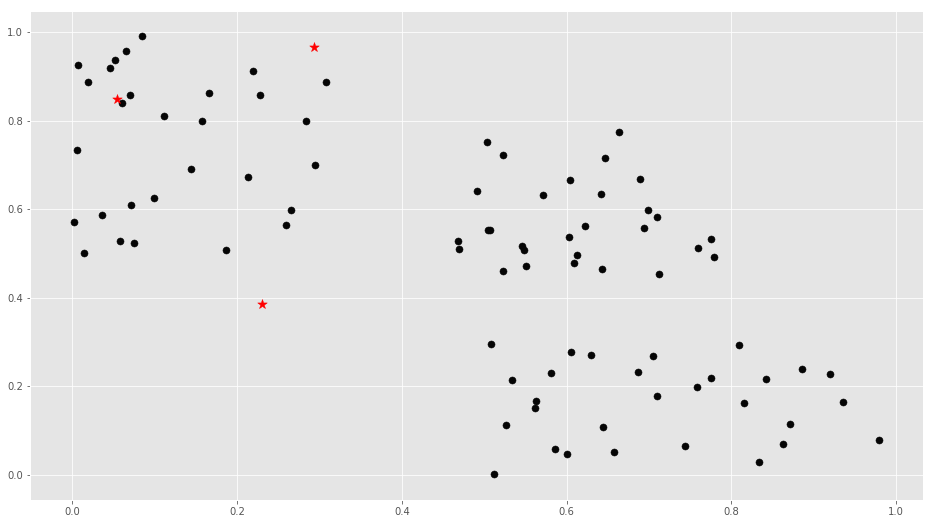

In [350]:
# Plotting along with the Centroids
plt.scatter(x1, x2, c='#050505', s=50)
plt.scatter(cx, cy, marker='*', s=100, c='r')

In [351]:
# To store the value of centroids when it updates
c_old = np.zeros(c.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(x.shape[0])
# Error func. - Distance between new centroids and old centroids
error=[]
error.append(np.linalg.norm(c_old-c))

print('Centroids : ' + str(c))

Centroids : [[0.05366669 0.84974351]
 [0.29347733 0.96629855]
 [0.23051211 0.38524408]]


In [352]:
'''# Repeate the following till the error we defined above reduces to 0. 
# This is done for the first cycle to show how cluster is assigned to each centroid 
for i in range(x.shape[0]):
    dist_list=[]
    for j in range(k):
        dist = np.linalg.norm(x[i]-c[j])
        dist_list.append(dist)
    cluster = np.argmin(dist_list)
    clusters[i] = cluster    
    print('Distances of centroids from ' + str(x[i]) + ": " + str(dist_list))
    print(str(x[i]) + ' belongs to cluster: ' + str(cluster))

print('Points in cluster 0 : ' + str([x[j] for j in range(len(x)) if clusters[j] == 0]))
print('Points in cluster 1 : ' + str([x[j] for j in range(len(x)) if clusters[j] == 1]))
print('Points in cluster 2 : ' + str([x[j] for j in range(len(x)) if clusters[j] == 2]))
'''

'# Repeate the following till the error we defined above reduces to 0. \n# This is done for the first cycle to show how cluster is assigned to each centroid \nfor i in range(x.shape[0]):\n    dist_list=[]\n    for j in range(k):\n        dist = np.linalg.norm(x[i]-c[j])\n        dist_list.append(dist)\n    cluster = np.argmin(dist_list)\n    clusters[i] = cluster    \n    print(\'Distances of centroids from \' + str(x[i]) + ": " + str(dist_list))\n    print(str(x[i]) + \' belongs to cluster: \' + str(cluster))\n\nprint(\'Points in cluster 0 : \' + str([x[j] for j in range(len(x)) if clusters[j] == 0]))\nprint(\'Points in cluster 1 : \' + str([x[j] for j in range(len(x)) if clusters[j] == 1]))\nprint(\'Points in cluster 2 : \' + str([x[j] for j in range(len(x)) if clusters[j] == 2]))\n'

In [353]:
for iteration in range(iterations):
    for i in range(x.shape[0]):
        dist_list=[]
        for j in range(k):
            dist = np.linalg.norm(x[i]-c[j])
            dist_list.append(dist)
        cluster = np.argmin(dist_list)
        clusters[i] = cluster    
        print('Distances of centroids from ' + str(x[i]) + ": " + str(dist_list))
        print(str(x[i]) + ' belongs to cluster: ' + str(cluster))
    
    # Storing the old centroid values
    c_old = deepcopy(c)
    for i in range(k):
        points = [x[j] for j in range(len(x)) if clusters[j] == i]
        print('Points in cluster ' + str(i) + ' : ' + str([x[j] for j in range(len(x)) if clusters[j] == i]))
        c[i] = np.mean(points,axis=0)
    error.append(np.linalg.norm(c_old-c))
    print(str(iteration) + ' iteration Over!')
    print('********************************************************************************')

Distances of centroids from [0.22767982 0.85820415]: [0.1742186934712586, 0.12654529556077282, 0.4729685469533063]
[0.22767982 0.85820415] belongs to cluster: 1
Distances of centroids from [0.97918822 0.07715065]: [1.2056076547769887, 1.1228461231895537, 0.8095909272763393]
[0.97918822 0.07715065] belongs to cluster: 2
Distances of centroids from [0.5045766  0.55311441]: [0.5397300897493901, 0.4639871095028782, 0.3213904073083969]
[0.5045766  0.55311441] belongs to cluster: 2
Distances of centroids from [0.0581324  0.52809798]: [0.3216765259178308, 0.4974002175636944, 0.2238794355668457]
[0.0581324  0.52809798] belongs to cluster: 2
Distances of centroids from [0.77534302 0.21792169]: [0.9591744002857081, 0.890091272221268, 0.5699451704674929]
[0.77534302 0.21792169] belongs to cluster: 2
Distances of centroids from [0.55042383 0.47085982]: [0.6247563592746141, 0.5581048721479394, 0.3311699882164957]
[0.55042383 0.47085982] belongs to cluster: 2
Distances of centroids from [0.04578654 

Points in cluster 2 : [array([0.97918822, 0.07715065]), array([0.77534302, 0.21792169]), array([0.55042383, 0.47085982]), array([0.58576994, 0.05803225]), array([0.70907217, 0.58187366]), array([0.88606507, 0.23956402]), array([0.60473874, 0.27810958]), array([0.75898912, 0.51202678]), array([0.64428586, 0.10730211]), array([0.60331259, 0.53647926]), array([0.60071795, 0.0465607 ]), array([0.64343051, 0.46461982]), array([0.65750045, 0.05025199]), array([0.61190566, 0.49526564]), array([0.74352735, 0.06386612]), array([0.92022078, 0.22637577]), array([0.60867954, 0.47863248]), array([0.50777585, 0.2952284 ]), array([0.77913749, 0.49180667]), array([0.758129  , 0.19708612]), array([0.54860594, 0.5077936 ]), array([0.53311287, 0.21439387]), array([0.84201324, 0.21490523]), array([0.81483483, 0.16192164]), array([0.69437997, 0.55707599]), array([0.52603056, 0.11168162]), array([0.86314456, 0.06988288]), array([0.70993462, 0.17850562]), array([0.69900126, 0.59815354]), array([0.93502506, 0

3 iteration Over!
********************************************************************************
Distances of centroids from [0.22767982 0.85820415]: [0.15227385901037385, 0.47742952493948515, 0.8471910484248584]
[0.22767982 0.85820415] belongs to cluster: 0
Distances of centroids from [0.97918822 0.07715065]: [1.0860107402085177, 0.617229983613413, 0.28090143550151714]
[0.97918822 0.07715065] belongs to cluster: 2
Distances of centroids from [0.5045766  0.55311441]: [0.4268858377413442, 0.10620147636144339, 0.44178478861152504]
[0.5045766  0.55311441] belongs to cluster: 1
Distances of centroids from [0.0581324  0.52809798]: [0.2282500318760612, 0.5527759706834756, 0.7486772477281086]
[0.0581324  0.52809798] belongs to cluster: 0
Distances of centroids from [0.77534302 0.21792169]: [0.8388567240478085, 0.3903992278023552, 0.08414541442802566]
[0.77534302 0.21792169] belongs to cluster: 2
Distances of centroids from [0.55042383 0.47085982]: [0.5077627675781977, 0.1163126538459184, 0.

Distances of centroids from [0.1434226  0.69115503]: [0.058743119147391006, 0.4809956181920127, 0.7758839457733808]
[0.1434226  0.69115503] belongs to cluster: 0
Distances of centroids from [0.86314456 0.06988288]: [1.0021009927726234, 0.5619691678475622, 0.17773015879387496]
[0.86314456 0.06988288] belongs to cluster: 2
Distances of centroids from [0.66409905 0.77306242]: [0.5406798184401921, 0.20917375669043942, 0.6120287490630621]
[0.66409905 0.77306242] belongs to cluster: 1
Distances of centroids from [0.09883778 0.62611036]: [0.12311969049086852, 0.5133301425845669, 0.7682217900281733]
[0.09883778 0.62611036] belongs to cluster: 0
Distances of centroids from [0.70993462 0.17850562]: [0.8160838074067877, 0.40541728520992876, 0.01571718021150534]
[0.70993462 0.17850562] belongs to cluster: 2
Distances of centroids from [0.69900126 0.59815354]: [0.5937943457911183, 0.0937315583193739, 0.43545161521299675]
[0.69900126 0.59815354] belongs to cluster: 1
Distances of centroids from [0.2

Points in cluster 2 : [array([0.97918822, 0.07715065]), array([0.77534302, 0.21792169]), array([0.58576994, 0.05803225]), array([0.88606507, 0.23956402]), array([0.60473874, 0.27810958]), array([0.64428586, 0.10730211]), array([0.60071795, 0.0465607 ]), array([0.65750045, 0.05025199]), array([0.74352735, 0.06386612]), array([0.92022078, 0.22637577]), array([0.50777585, 0.2952284 ]), array([0.758129  , 0.19708612]), array([0.53311287, 0.21439387]), array([0.84201324, 0.21490523]), array([0.81483483, 0.16192164]), array([0.52603056, 0.11168162]), array([0.86314456, 0.06988288]), array([0.70993462, 0.17850562]), array([0.93502506, 0.16491008]), array([0.62945838, 0.27098232]), array([0.80922928, 0.29198518]), array([0.56164201, 0.1508424 ]), array([0.51188718, 0.00051557]), array([0.70447078, 0.26733186]), array([0.56254379, 0.16666468]), array([0.83377219, 0.02773394]), array([0.58128534, 0.2286503 ]), array([0.87117996, 0.11348521]), array([0.68620349, 0.23187688])]
8 iteration Over!
**

In [354]:
c

array([[0.12406634, 0.74661753],
       [0.60922423, 0.57121492],
       [0.7116907 , 0.16288685]])

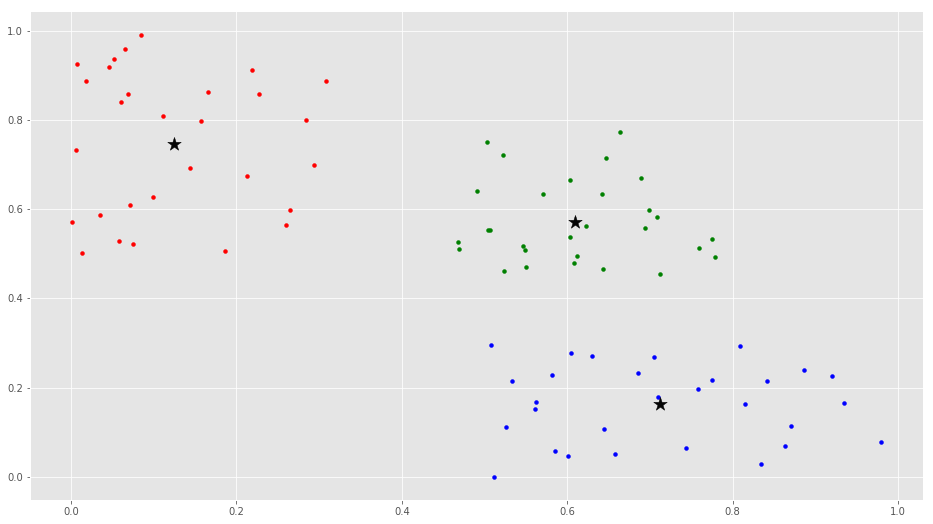

In [355]:
colors = ['r', 'g', 'b']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([x[j] for j in range(len(x)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=15, c=colors[i])
ax.scatter(c[:, 0], c[:, 1], marker='*', s=200, c='#050505')

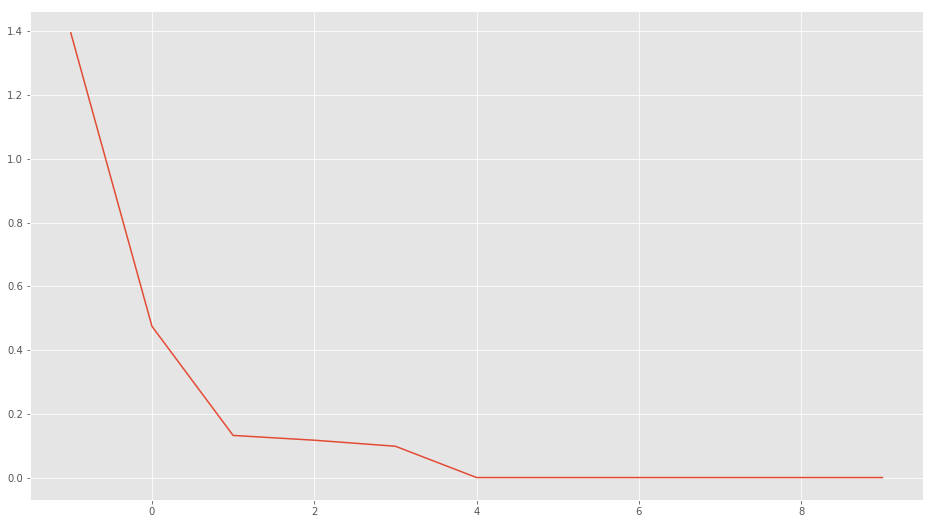

In [361]:
plt.plot(np.arange(-1,iterations,1),error)